# Gun Violence EDA
### MySQL / python


In [1]:
#Read data
import os
import pandas as pd
cwd = os.getcwd()
gun_dir = os.path.join(cwd,'data','gun_violence_archive')
print(gun_dir)

/Users/hyunjoonrhee/GitHub/Practice/data/gun_violence_archive


In [2]:
all_cases = pd.read_csv(os.path.join(gun_dir,'all_incidents.csv'))
mass_cases = pd.read_csv(os.path.join(gun_dir,'mass_shootings.csv'))
cases_2018 = pd.read_csv(os.path.join(gun_dir,'gun-violence-data_01-2013_03-2018.csv'))

In [3]:
#print column methods using list & keys
#print(list(guns))
cases_2018.keys()

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [9]:
print(list(all_cases))
print(list(mass_cases))

['incident_id', 'date', 'state', 'city', 'address', 'n_killed', 'n_injured']
['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address', '# Killed', '# Injured']


In [4]:
mass_cases['Incident Date'] = pd.to_datetime(mass_cases['Incident Date']).dt.strftime('%Y-%m-%d')

In [5]:
print('Number of Mass Shootings :  ' + str(len(mass_cases)))

# Check for duplicate id_numbers
duplicate_id_numbers = all_cases[all_cases['incident_id'].isin(mass_cases['Incident ID'])]

# Print the duplicate id_numbers 
print('Number of duplicate ids of mass_shootings and all_incidents table : ' + str(len(duplicate_id_numbers['incident_id'])))
print('This indicates that all mass shootings are included in the all_incidents table')



Number of Mass Shootings :  3609
Number of duplicate ids of mass_shootings and all_incidents table : 3609
This indicates that all mass shootings are included in the all_incidents table


In [8]:
list(all_cases['state'].unique())

['Arkansas',
 'Colorado',
 'Missouri',
 'South Carolina',
 'California',
 'Kentucky',
 'Louisiana',
 'Georgia',
 'Utah',
 'Illinois',
 'Connecticut',
 'Ohio',
 'Pennsylvania',
 'New York',
 'Nebraska',
 'Indiana',
 'Texas',
 'Virginia',
 'Maryland',
 'North Carolina',
 'Arizona',
 'West Virginia',
 'Oregon',
 'Wyoming',
 'Rhode Island',
 'Kansas',
 'Florida',
 'Montana',
 'Minnesota',
 'Alabama',
 'Iowa',
 'Alaska',
 'Wisconsin',
 'Tennessee',
 'Michigan',
 'Hawaii',
 'Mississippi',
 'Massachusetts',
 'Washington',
 'Nevada',
 'Oklahoma',
 'District of Columbia',
 'New Jersey',
 'Idaho',
 'New Mexico',
 'Delaware',
 'Maine',
 'Vermont',
 'North Dakota',
 'New Hampshire',
 'South Dakota']

In [44]:
from sqlalchemy import create_engine

host="localhost"
user="root"
password="Dlguswns0926!"
database_name='GunViolence'
# Create a MySQL database engine
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database_name}')
con = engine.connect()

In [ ]:
'''
import sqlite3
con = sqlite3.connect(os.path.join(gun_dir,'gfg.db'))
cursor = con.con()
print('Connected to the database!' + ' To close connection use .close()')

#sqliteconnection.close()
#--> to close connection
'''

In [45]:
#import csv to sql
all_cases.to_sql('all_incidents',con, if_exists='replace',index=False)
mass_cases.to_sql('mass_shootings',con, if_exists='replace',index=False)

3609

In [46]:
import sqlalchemy

sql = sqlalchemy.text("SELECT * FROM all_incidents")
pd.read_sql_query(sql, con)

,incident_id,date,state,city,address,n_killed,n_injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0
...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3


In [74]:
sql = sqlalchemy.text("SELECT * FROM mass_shootings")
pd.read_sql_query(sql, con)

,incident_id,date,state,city,address,n_killed,n_injured
0,271363,2014-12-29,Louisiana,New Orleans,Poydras and Bolivar,0,4
1,269679,2014-12-27,California,Los Angeles,8800 block of South Figueroa Street,1,3
2,270036,2014-12-27,California,Sacramento,4000 block of May Street,0,4
3,269167,2014-12-26,Illinois,East St. Louis,2500 block of Summit Avenue,1,3
4,268598,2014-12-24,Missouri,Saint Louis,18th and Pine,1,3
...,...,...,...,...,...,...,...
3604,274867,2015-01-06,Florida,Miami,1300 block of NW 62nd Street,1,3
3605,273535,2015-01-04,Virginia,Roanoke,3634 Shenandoah Ave NW,2,4
3606,273397,2015-01-04,Texas,Dallas,2000 block of Ben Hur St.,3,1
3607,273965,2015-01-02,Georgia,Savannah,500 block of W. 54th Street,1,4


In [ ]:
#Rename columns to compare
con.execute("ALTER TABLE mass_shootings RENAME COLUMN 'Incident ID' TO incident_id;")
con.execute("ALTER TABLE mass_shootings RENAME COLUMN 'Incident Date' TO date;")
con.execute("ALTER TABLE mass_shootings RENAME COLUMN 'State' TO state;")
con.execute("ALTER TABLE mass_shootings RENAME COLUMN 'City Or County' TO city;")
con.execute("ALTER TABLE mass_shootings RENAME COLUMN 'Address' TO address;")
con.execute("ALTER TABLE mass_shootings RENAME COLUMN '# Killed' TO n_killed;")
con.execute("ALTER TABLE mass_shootings RENAME COLUMN '# Injured' TO n_injured;")
pd.read_sql_query("SELECT * FROM mass_shootings", con)


In [62]:
def sqltext(query):
    return sqlalchemy.text(query)
sql = sqlalchemy.text("ALTER TABLE mass_shootings CHANGE COLUMN `Incident ID` incident_id VARCHAR(255) NOT NULL;")
con.execute(sql)
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `Incident Date` TO date;"))

In [ ]:
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `State` TO state;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `City Or County` TO city;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `Address` TO address;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `# Killed` TO n_killed;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `# Injured` TO n_injured;"))
pd.read_sql_query(sqltext("SELECT * FROM mass_shootings", con))

In [76]:
#check if there are duplicate incident id in two tables
query = sqltext('''
SELECT incident_id
FROM all_incidents
WHERE EXISTS (
    SELECT *
    FROM mass_shootings
    WHERE all_incidents.incident_id = mass_shootings.incident_id
)
''')
result = con.execute(query)
duplicate_rows = result.fetchall()

In [87]:
con.execute(sqltext("DROP TABLE top_15_states;"))
query = sqltext('''
CREATE TABLE top_15_states AS
SELECT state, COUNT(*) AS frequency
FROM all_incidents
GROUP BY state
ORDER BY frequency DESC
LIMIT 15
''')
con.execute(query)
result = con.execute(sqltext('SELECT * FROM top_15_states;'))
top15states = result.fetchall()

In [88]:
query = sqltext('''
CREATE TABLE top_30_cities AS
SELECT city, COUNT(*) AS frequency
FROM all_incidents
GROUP BY city
ORDER BY frequency DESC
LIMIT 30
''')
con.execute(query)
result = con.execute(sqltext('SELECT * FROM top_15_states;'))
top30cities = result.fetchall()

In [90]:
con.execute(sqltext("ALTER TABLE top_15_states RENAME COLUMN frequency TO incidents;"))
con.execute(sqltext("ALTER TABLE top_30_cities RENAME COLUMN frequency TO incidents;"))

In [92]:
top_15_states = pd.read_sql_query(sqltext("SELECT * FROM top_15_states"), con)
top_30_cities = pd.read_sql_query(sqltext("SELECT * FROM top_30_cities"), con)

In [ ]:
top_15_states

In [95]:
#Gun violence number by year
query = sqltext('''
CREATE TABLE shots_year AS
SELECT DATE_FORMAT(date, '%Y') AS year, COUNT(*) AS incidents
FROM all_incidents
GROUP BY year
ORDER BY year
''')
con.execute(query)

In [96]:
shots_per_year = pd.read_sql_query(sqltext('SELECT * FROM shots_year'), con)

In [102]:
query = sqltext('''
CREATE TABLE mass_year AS
SELECT DATE_FORMAT(date, '%Y') AS year, COUNT(*) AS incidents
FROM mass_shootings
GROUP BY year
ORDER BY year
''')
con.execute(query)
massshot_peryear = pd.read_sql_query(sqltext('SELECT * FROM mass_year'),con)

Text(0.5, 1.0, 'Number of gun violence incidents per year')

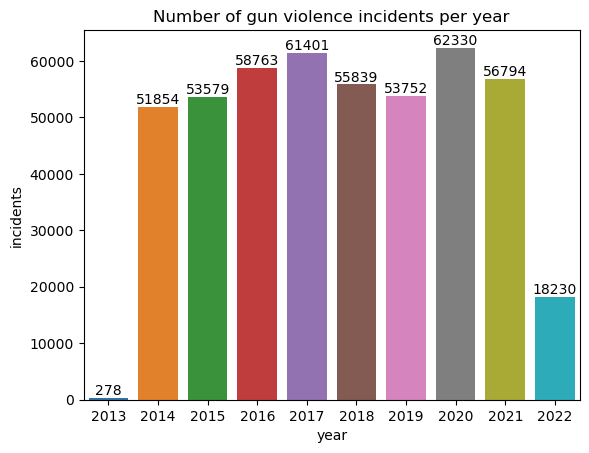

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data = shots_per_year,x = 'year', y = 'incidents')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.title('Number of gun violence incidents per year')

Text(0.5, 1.0, 'Number of mass shooting incidents per year')

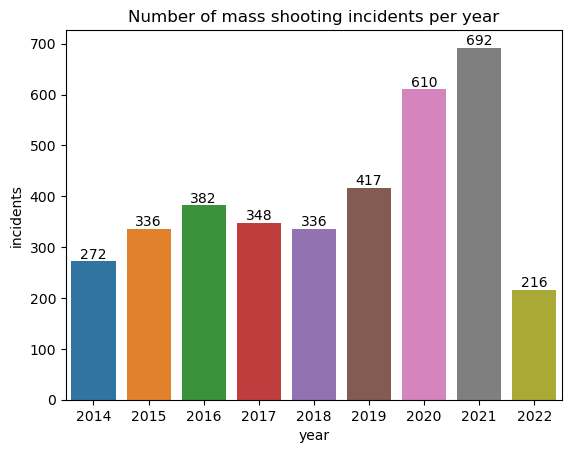

In [103]:
sns.barplot(data = massshot_peryear,x = 'year', y = 'incidents')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.title('Number of mass shooting incidents per year')

<Figure size 6000x3000 with 0 Axes>

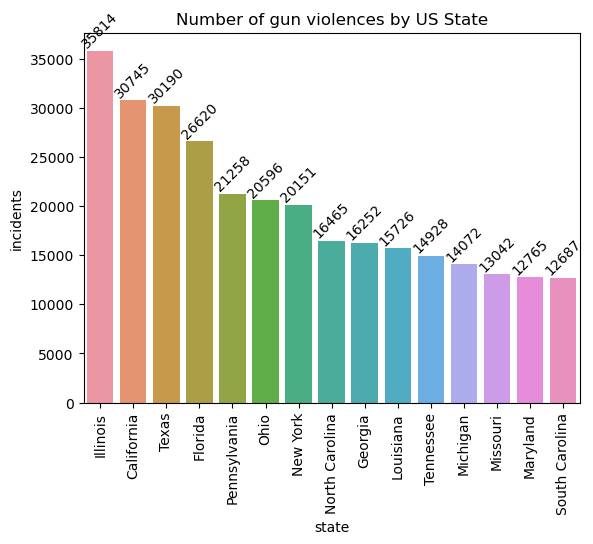

<Figure size 6000x3000 with 0 Axes>

In [104]:
sns.barplot(data = top_15_states, x = 'state', y = 'incidents')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', rotation=45)
plt.xticks(rotation = 90)
plt.title('Number of gun violences by US State')
plt.figure(figsize=(60,30))

<Figure size 4000x2500 with 0 Axes>

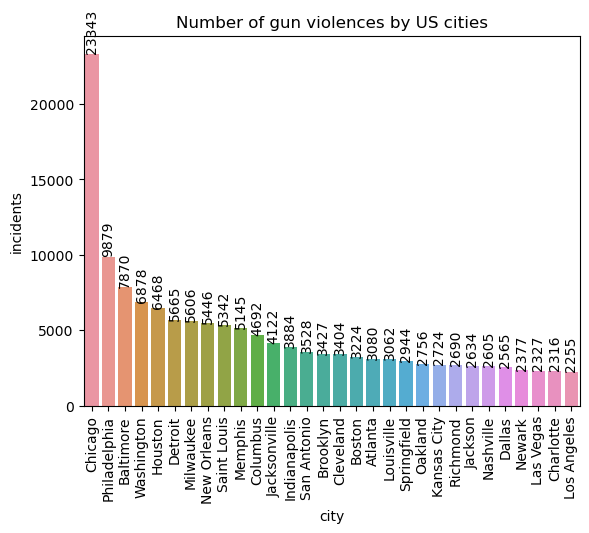

<Figure size 4000x2500 with 0 Axes>

In [105]:
sns.barplot(data = top_30_cities, x = 'city', y = 'incidents')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', rotation=90)
plt.xticks(rotation = 90)
plt.title('Number of gun violences by US cities')
plt.figure(figsize=(40,25))

Democratic vs Republican State by wisevoter.com

Republican States
1. Alabama
2. Alaska
3. Arkansas
4. Idaho
5. Indiana
6. Iowa
7. Kansas
8. Kentucky
9. Louisiana
10. Mississippi
11. Missouri
12. Montana
13. Nebraska
14. North Dakota
15. Oklahoma
16. South Carolina
17. South Dakota
18. Tennessee
19. Texas
20. Utah
21. West Virginia
22. Wyoming

Democratic States
1. California
2. Colorado
3. Connecticut
4. Delaware
5. District of Columbia
6. Hawaii
7. Illinois
8. Maine
9. Maryland
10. Massachusetts
11. New Hampshire
12. New Jersey
13. New Mexico
14. New York
15. Oregon
16. Rhode Island
17. Vermont
18. Virginia
19. Washington

In [ ]:
'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine',
'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington'

In [107]:
query1 = sqltext('''
ALTER TABLE all_incidents
ADD COLUMN `Dem/Rep` VARCHAR(3);
''')
query2 = sqltext('''
UPDATE all_incidents
SET `Dem/Rep` = CASE
    WHEN state IN ('California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine',
'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington') THEN 'Dem'
    ELSE 'Rep'
END;
''')
con.execute(query1)
con.execute(query2)

In [108]:
query1 = sqltext('''
ALTER TABLE mass_shootings
ADD COLUMN `Dem/Rep` VARCHAR(3);
''')
query2 = sqltext('''
UPDATE mass_shootings
SET `Dem/Rep` = CASE
    WHEN state IN ('California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine',
'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington') THEN 'Dem'
    ELSE 'Rep'
END;
''')
con.execute(query1)
con.execute(query2)

In [110]:
query1 = sqltext('''ALTER TABLE all_incidents RENAME COLUMN `Dem/Rep` TO Dem_Rep''')
query2 = sqltext('''ALTER TABLE mass_shootings RENAME COLUMN `Dem/Rep` TO Dem_Rep''')
con.execute(query1)
con.execute(query2)

In [111]:
pd.read_sql_query(sqltext('SELECT * FROM all_incidents'),con)

,incident_id,date,state,city,address,n_killed,n_injured,Dem_Rep
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,Rep
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,Dem
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,Rep
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,Rep
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,Dem
...,...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,Rep
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,Dem
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,Rep
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,Dem


In [112]:
query = sqltext('''
CREATE TABLE politic_all AS
SELECT Dem_Rep, SUM(n_killed) AS killed, SUM(n_injured) AS injured, COUNT(*) AS incidents
FROM all_incidents
GROUP BY Dem_Rep
ORDER BY incidents DESC
''')
con.execute(query)

In [113]:
query = sqltext('''
CREATE TABLE politic_mass AS
SELECT Dem_Rep, SUM(n_killed) AS killed, SUM(n_injured) AS injured, COUNT(*) AS incidents
FROM mass_shootings
GROUP BY Dem_Rep
ORDER BY incidents DESC
''')
con.execute(query)

In [114]:
pol_all = pd.read_sql_query(sqltext('SELECT * FROM politic_all'),con)
mass_all = pd.read_sql_query(sqltext('SELECT * FROM politic_mass'),con)
pol_all = pol_all.melt(id_vars='Dem_Rep')
mass_all = mass_all.melt(id_vars='Dem_Rep')

<Figure size 4000x2500 with 0 Axes>

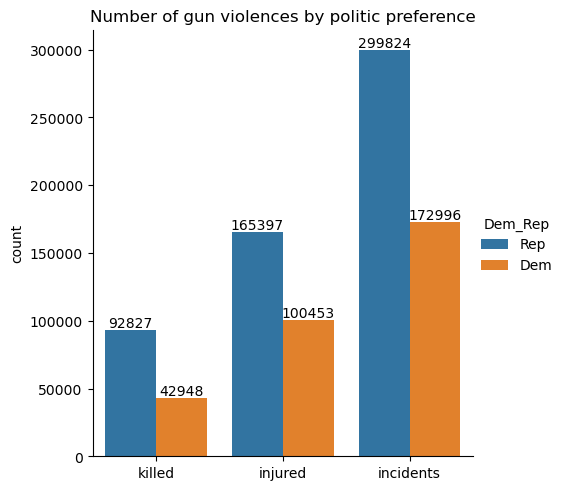

<Figure size 4000x2500 with 0 Axes>

In [115]:
sns.catplot(data=pol_all, x = 'variable', y = 'value', hue='Dem_Rep',kind='bar')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', rotation=0)
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('count')
plt.title('Number of gun violences by politic preference')
plt.figure(figsize=(40,25))

<Figure size 4000x2500 with 0 Axes>

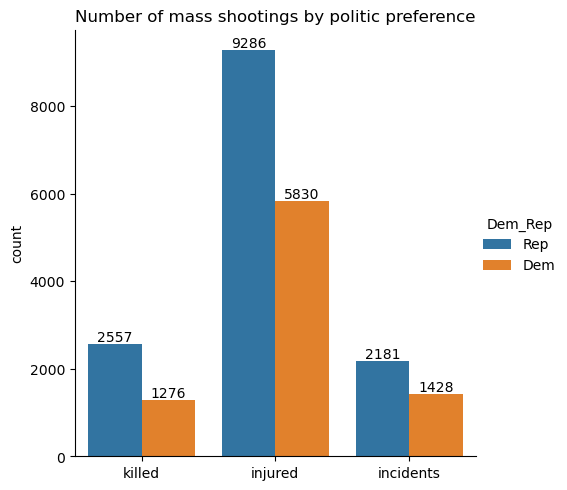

<Figure size 4000x2500 with 0 Axes>

In [116]:
sns.catplot(data=mass_all, x = 'variable', y = 'value', hue='Dem_Rep',kind='bar')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', rotation=0)
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('count')
plt.title('Number of mass shootings by politic preference')
plt.figure(figsize=(40,25))

In [117]:
con.commit()
con.close()